In [17]:
%load_ext autoreload
%autoreload 1
import numpy as np
import cv2
import pandas as pd
import pickle
from matplotlib.pyplot import *
%aimport utility

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
with open('dataset/v01_T1_L_3d.np', 'rb') as f:
    img_l = pickle.load(f)
with open('dataset/v01_T1_R_3d.np', 'rb') as f:
    img_r = pickle.load(f)   

In [214]:
x = cv2.pyrDown(img_l[:5000,:5000])

In [215]:
y = img_l[1000:2000,1000:2000]

In [216]:
surf = cv2.xfeatures2d.SIFT_create(100)

In [217]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,255))
x = scaler.fit_transform(x).astype('uint8')
y = scaler.fit_transform(y).astype('uint8')
kp1, des1 = surf.detectAndCompute(x,None)
kp2, des2 = surf.detectAndCompute(y,None)

In [218]:
bf = cv2.BFMatcher()
#(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

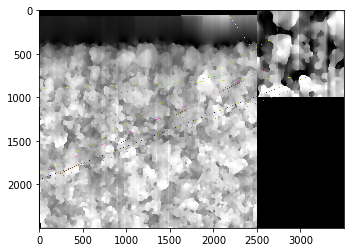

In [222]:
img3 = cv2.drawMatches(x,kp1,y,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
imshow(img3)

In [203]:
des1.shape

(400, 128)

In [83]:
#matchTemplate(Image, Template, ResImage, CV_TM_SQDIFF);
res = cv2.matchTemplate(x, y, cv2.TM_SQDIFF)

In [93]:
np.unravel_index(res.argmax(), res.shape)

(0, 225)

In [94]:
res.shape

(4001, 4001)

In [95]:
x.shape

(5000, 5000)